This notebook is to get familar with the data and to play a bit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
import mysql.connector

Function for quering the SQL database with a given command:

In [3]:
def query(command):
    conn = mysql.connector.connect(user='xxxx',password='xxxxx',host='xxxx',database='xxxx',port='xxxx')
    cursor = conn.cursor()    
    result = pd.read_sql_query(command, conn)
    conn.close()
    return result

For getting an overview of the tables available in this database:

In [4]:
query('SHOW TABLES')

,Tables_in_factdata
0,Analysis
1,AnalysisCutsLCStatus
2,AnalysisResultsNightISDC
3,AnalysisResultsNightLP
4,AnalysisResultsRunCutsLC
5,AnalysisResultsRunISDC
6,AnalysisResultsRunLP
7,AutoSchedule
8,AuxDataInsertStatus
9,AuxFilesAvailISDCStatus


## get runwise data

Here we select the data according to each run.
These data are more related to external/telescope conditions, such as: 
- (telescope) pointing position in the sky
- (telescope) the time duration of the run
- (external) humidity
- (external) wind speed

here is another example of command:
we select all the columns from table RunInfo and we want to see the first 10 entries

In [4]:
cmd = '''
SELECT * 
FROM RunInfo
LIMIT 10
'''
runinfo = query(cmd)

In [5]:
runinfo

,fNight,fRunID,fRunTypeKey,fNumEvents,fROI,fMd5sumRaw,fMd5sumRawZip,fLastUpdate,fRunStart,fRunStop,...,fHumidityRms,fAirPressureMean,fAirPressureRms,fDewPointMean,fDewPointRms,fWindSpeedMean,fWindSpeedRms,fWindGustMean,fWindGustRms,FileID
0,20111115,1,3,1000,1024,7d051be18b457ace5e2bfef13f13f350,d40e01c121e9cb23f9393870eb141fa4,2018-08-29 21:57:48,2011-11-15 20:47:29,2011-11-15 21:30:55,...,None,None,None,None,None,None,None,None,None,111115001
1,20111115,2,8,0,0,083df422b55c9a96da14db42b1f039de,c03b844d33ab92f917aa8af9dade9d4a,2018-08-29 21:57:48,NaT,NaT,...,None,None,None,None,None,None,None,None,None,111115002
2,20111115,3,3,1000,1024,b76042080f4156f66bdd430cf0f39833,dbe38cd8af6a3178346e89e282514940,2018-08-29 21:57:48,2011-11-16 01:31:55,2011-11-16 01:32:36,...,None,None,None,None,None,None,None,None,None,111115003
3,20111115,4,8,0,0,3d8e4d018ba4ebab75e9994c8bfe676e,04a94be2901d14123e511a90d09456b4,2018-08-29 21:57:48,NaT,NaT,...,None,None,None,None,None,None,None,None,None,111115004
4,20111115,5,2,1000,300,6f52a13b8d5929990514ba41a60525e3,ccb3f340dad853352b30ada455198a50,2018-08-29 21:57:48,2011-11-16 01:36:38,2011-11-16 01:37:17,...,None,None,None,None,None,None,None,None,None,111115005
5,20111115,6,3,1000,1024,81450f4aa40cd83618cc54936608d652,89f9ad0711d019fd389c62b6435ac04c,2018-08-29 21:57:48,2011-11-16 01:44:25,2011-11-16 01:45:07,...,None,None,None,None,None,None,None,None,None,111115006
6,20111115,7,4,1000,1024,70be34d4f1244d2ad15198c931769c4a,a5fd9a2811b752929a54c3b85631d9c8,2018-08-29 21:57:48,2011-11-16 01:45:39,2011-11-16 01:46:20,...,None,None,None,None,None,None,None,None,None,111115007
7,20111115,8,3,1000,1024,efc55b6b5945017b8aa9435ffeb34720,34ad8fbb828852a60b124c8702157376,2018-08-29 21:57:48,2011-11-16 01:46:39,2011-11-16 01:47:23,...,None,None,None,None,None,None,None,None,None,111115008
8,20111115,9,3,1000,1024,2766adb5d0ca5ba80ec15afc7eb451b6,69dc2887f87cad41214ac29d0d73815a,2018-08-29 21:57:48,2011-11-16 01:49:06,2011-11-16 01:49:49,...,None,None,None,None,None,None,None,None,None,111115009
9,20111115,10,5,1000,1024,1b1208e5318cb16dc3449c443a90b4d7,c72547f8fbca467c725edc17563ba4ab,2018-08-29 21:57:48,2011-11-16 01:50:30,2011-11-16 01:51:11,...,None,None,None,None,None,None,None,None,None,111115010


In this last example we can see all the information about the runs, such as date, starting time and etc...

It is interesting to note that per night (fNight = YYYY/MM/DD), there are several runs (fRunId), and these two data can be merge into FileId, as we see in the last column as fNight+fRunID.
For instance FileId = 111115010 means year 2011, month 11, day 15, runid 010

This is how you can see the columns names of the data you query before:

In [9]:
list(runinfo.columns)

['fNight',
 'fRunID',
 'fRunTypeKey',
 'fNumEvents',
 'fROI',
 'fMd5sumRaw',
 'fMd5sumRawZip',
 'fLastUpdate',
 'fRunStart',
 'fRunStop',
 'fFitsFileErrors',
 'fHasDrsFile',
 'fNumPhysicsTrigger',
 'fNumExt1Trigger',
 'fNumExt2Trigger',
 'fNumELPTrigger',
 'fNumILPTrigger',
 'fNumPedestalTrigger',
 'fNumTimeTrigger',
 'fNumOtherTrigger',
 'fROITimeMarker',
 'fBiasVoltageMedian',
 'fThresholdMedian',
 'fTriggerRateMedian',
 'fDeclination',
 'fRightAscension',
 'fDrsStep',
 'fZenithDistanceMin',
 'fZenithDistanceMean',
 'fZenithDistanceMax',
 'fAzimuthMax',
 'fAzimuthMin',
 'fAzimuthMean',
 'fSequenceID',
 'fExcludedFDAKEY',
 'fCompileTime',
 'fRevisionNumber',
 'fDataSum',
 'fCheckSum',
 'fMoonDisk',
 'fMoonZenithDistance',
 'fSunZenithDistance',
 'fAngleToMoon',
 'fCameraTempMean',
 'fOutsideTempMean',
 'fOutsideTempRms',
 'fCameraTempRms',
 'fCurrentsMedMean',
 'fCurrentsMedRms',
 'fCtrlDevMean',
 'fCtrlDevRms',
 'fAngleToSun',
 'fCameraTempRmsMean',
 'fDrsTempMinMean',
 'fDrsTempMaxM

## get eventwise data

Here we select the data according to each event (or ellipse) we see in the telescope

In [6]:
# here is another example of command:
# we select all the columns from table Images and we want to see the first 10 entries

cmd = '''
SELECT * 
FROM Images
LIMIT 10
'''
Images = query(cmd)

In [7]:
Images

,FileId,EvtNumber,Mjd,MilliSec,NanoSec,Length,Width,Delta,Size,MeanX,...,Leakage1,Leakage2,Conc,Conc1,ConcCOG,ConcCore,UsedArea,CoreArea,NumUsedPixels,NumCorePixels
0,120314028,1,56001,-9377202,340000,13.74760,11.72700,1.035390,134.7540,57.127800,...,0.000000,0.000000,0.160710,0.081167,0.172421,0.481665,1953.970,1953.970,25,25
1,120314028,3,56001,-9377110,226000,16.23160,5.96525,0.995115,75.6641,-152.283000,...,0.272793,0.465049,0.231285,0.128033,0.290552,0.332060,1094.220,1094.220,14,14
2,120314028,6,56001,-9377029,219000,12.91170,6.09145,0.376398,67.9180,-44.570400,...,0.567550,0.328061,0.396158,0.275148,0.457123,0.566630,1094.220,1094.220,14,14
3,120314028,7,56001,-9377015,949000,17.29650,9.49144,1.488730,1056.5400,176.011000,...,0.328165,0.366690,0.251056,0.156170,0.169953,0.553695,2970.030,2970.030,38,38
4,120314028,8,56001,-9377010,599000,37.62550,13.27560,0.546626,126.7360,106.034000,...,0.000000,0.000000,0.114164,0.059425,0.085639,0.389773,3204.510,3204.510,41,41
5,120314028,10,56001,-9376983,255000,16.48190,5.75787,0.637705,80.7812,-40.122600,...,0.000000,0.000000,0.339652,0.172534,0.267602,0.555899,1328.700,1328.700,17,17
6,120314028,15,56001,-9376726,697000,9.18462,3.18828,-0.389129,26.1016,-63.939500,...,0.000000,0.970069,0.722538,0.486082,0.414098,0.844059,390.794,390.794,5,5
7,120314028,16,56001,-9376713,101000,29.66440,5.09491,0.160031,80.0703,-3.452310,...,0.074934,0.212411,0.248219,0.131525,0.142550,0.451703,1328.700,1328.700,17,17
8,120314028,17,56001,-9376703,560000,33.08920,8.27468,-0.290129,162.3630,-47.730800,...,0.000000,0.000000,0.106243,0.057163,0.117888,0.367906,2657.400,2657.400,34,34
9,120314028,18,56001,-9376694,133000,7.27767,5.40666,-1.088170,38.5312,0.921685,...,0.000000,0.000000,0.622466,0.446066,0.695255,0.695255,547.112,547.112,7,7


In this example we can see that the columns names are different, because now we are selecting the data from the images that the CR/gammarays will produce in the camera. Such as length or width of the image/ellipse.

In [10]:
list(Images.columns)

['FileId',
 'EvtNumber',
 'Mjd',
 'MilliSec',
 'NanoSec',
 'Length',
 'Width',
 'Delta',
 'Size',
 'MeanX',
 'MeanY',
 'SinDelta',
 'CosDelta',
 'Asym',
 'M3Long',
 'M3Trans',
 'SlopeLong',
 'SlopeTrans',
 'TimeSpread',
 'TimeSpreadWeighted',
 'SlopeSpread',
 'SlopeSpreadWeighted',
 'NumIslands',
 'SizeSubIslands',
 'SizeMainIsland',
 'Leakage1',
 'Leakage2',
 'Conc',
 'Conc1',
 'ConcCOG',
 'ConcCore',
 'UsedArea',
 'CoreArea',
 'NumUsedPixels',
 'NumCorePixels']

## merging two tables

However, note that in both tables from RunInfo, which is runwise, and from Images, which is eventwise, there is a common column: FileId!

It is important because the tables are stored separately (runwise and eventwise). However, sometimes you need information from both tables and you need to merge these two tables accordingly. You can use the FileId to match both tables together.

Here we can see the common column from different tables

In this example we are selecting from two different tables: Images and RunInfo <br>
The first two columns we are selecting is the FileId from each table (we can use them to merge in one table correctly).<br>
We are also selecting other parameters just for learning and testing.

The left join command means we are going to join the two different tables in one and the condition to merge them is where `Images.FileId = RunInfo.FileId`

In [12]:
cmd = '''
SELECT
   Images.FileId,
   RunInfo.fileid,
   Images.Leakage1,
   RunInfo.fRunStart,
   RunInfo.fRunStop,
   RunInfo.fAzimuthMean
FROM
   Images
   LEFT JOIN RunInfo ON Images.FileId = RunInfo.FileId
LIMIT 10
'''
joint = query(cmd)

In [13]:
joint

,FileId,fileid,Leakage1,fRunStart,fRunStop,fAzimuthMean
0,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
1,120314028,120314028,0.272793,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
2,120314028,120314028,0.567550,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
3,120314028,120314028,0.328165,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
4,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
5,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
6,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
7,120314028,120314028,0.074934,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
8,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88
9,120314028,120314028,0.000000,2012-03-14 21:23:42,2012-03-14 21:28:42,-94.88


As you can see the fileid is the same in the lines, as we properly asked before. 
You can see that Leakage changes from line to line but the last 3 parameters don't. 

(this can be a question for the students)
It occours because in 1 run we have several events, and therefore several events will belong to the same run, as it is the case

## setting filters to data

We select all the columns from Images, and we get the Position of the source 

In [19]:
cmd = '''
SELECT
   Images.*,
   Position.X,
   Position.Y,
   RunInfo.fRunStart,
   RunInfo.fZenithDistanceMean
FROM
   Images
LEFT JOIN Position USING (FileId, EvtNumber)
LEFT JOIN RunInfo USING (FileId)
WHERE
   fSourceKey=5
AND
   FileId BETWEEN 180100000 AND 180200000
AND
   fR750Cor>0.9*fR750Ref
AND
   NumUsedPixels>5.5
AND
   NumIslands<3.5
AND
   Leakage1<0.1
AND
   Width*Length*PI() < LOG10(Size)*898-1535;
'''
filters = query(cmd)

In [22]:
filters

,FileId,EvtNumber,Mjd,MilliSec,NanoSec,Length,Width,Delta,Size,MeanX,...,ConcCOG,ConcCore,UsedArea,CoreArea,NumUsedPixels,NumCorePixels,X,Y,fRunStart,fZenithDistanceMean
0,180104086,3,58123,-3581350,651000,28.4400,10.06490,-0.933845,1049.610,75.44240,...,0.143803,0.514477,4845.840,4845.840,62,62,49.8986,11.4513,2018-01-04 23:00:18,12.30
1,180104086,4,58123,-3581344,980000,19.1737,9.37247,0.602670,241.312,-65.57100,...,0.151645,0.544289,1953.970,1953.970,25,25,49.8986,11.4512,2018-01-04 23:00:18,12.30
2,180104086,8,58123,-3581054,366000,19.0309,8.74370,-0.651538,349.703,42.60460,...,0.193914,0.453599,2344.760,2344.760,30,30,49.8991,11.4490,2018-01-04 23:00:18,12.30
3,180104086,15,58123,-3580604,820000,13.6406,6.76353,-1.519410,123.516,8.61249,...,0.224415,0.326376,937.906,937.906,12,12,49.8999,11.4455,2018-01-04 23:00:18,12.30
4,180104086,16,58123,-3580512,62000,17.1553,8.84552,1.130710,239.637,78.07520,...,0.224037,0.486674,1875.810,1875.810,24,24,49.9001,11.4447,2018-01-04 23:00:18,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170250,180126097,3268,58145,2134116,11000,33.7732,11.40490,-0.146884,1168.270,-78.48660,...,0.077733,0.495152,5080.320,5080.320,65,65,18.1758,47.8622,2018-01-27 00:30:37,29.65
170251,180126097,3278,58145,2135158,658000,22.0569,7.18876,-0.022056,342.391,-137.85200,...,0.142518,0.496418,1953.970,1953.970,25,25,18.1763,47.8620,2018-01-27 00:30:37,29.65
170252,180126097,3281,58145,2135673,54000,23.0743,3.64324,0.400731,132.812,-113.37200,...,0.213500,0.355294,937.906,937.906,12,12,18.1765,47.8619,2018-01-27 00:30:37,29.65
170253,180126097,3288,58145,2136287,465000,16.0883,8.01564,-0.912887,274.773,19.24970,...,0.208581,0.479600,1719.490,1719.490,22,22,18.1768,47.8618,2018-01-27 00:30:37,29.65


In [23]:
filters[:3]

,FileId,EvtNumber,Mjd,MilliSec,NanoSec,Length,Width,Delta,Size,MeanX,...,ConcCOG,ConcCore,UsedArea,CoreArea,NumUsedPixels,NumCorePixels,X,Y,fRunStart,fZenithDistanceMean
0,180104086,3,58123,-3581350,651000,28.4400,10.06490,-0.933845,1049.610,75.4424,...,0.143803,0.514477,4845.84,4845.84,62,62,49.8986,11.4513,2018-01-04 23:00:18,12.3
1,180104086,4,58123,-3581344,980000,19.1737,9.37247,0.602670,241.312,-65.5710,...,0.151645,0.544289,1953.97,1953.97,25,25,49.8986,11.4512,2018-01-04 23:00:18,12.3
2,180104086,8,58123,-3581054,366000,19.0309,8.74370,-0.651538,349.703,42.6046,...,0.193914,0.453599,2344.76,2344.76,30,30,49.8991,11.4490,2018-01-04 23:00:18,12.3


### and this is how you can play with data and visualize it

In [28]:
filters['fZenithDistanceMean']

0         12.30
1         12.30
2         12.30
3         12.30
4         12.30
          ...  
170250    29.65
170251    29.65
170252    29.65
170253    29.65
170254    29.65
Name: fZenithDistanceMean, Length: 170255, dtype: float64

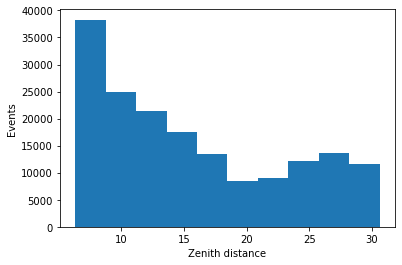

In [31]:
plt.hist(filters['fZenithDistanceMean'].values)
plt.xlabel('Zenith distance')
plt.ylabel('Events');

There are parameters that are clearly not correlated:

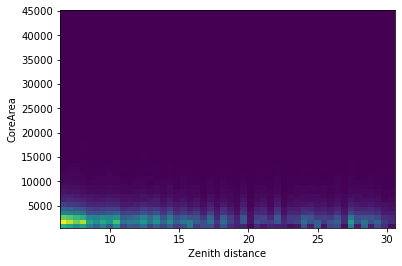

In [37]:
plt.hist2d(filters['fZenithDistanceMean'].values, filters['CoreArea'].values, bins=50)
plt.xlabel('Zenith distance')
plt.ylabel('CoreArea');

And there are other parameters that are clearly correlated:

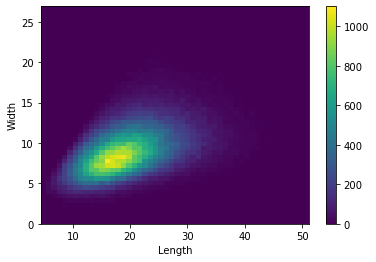

In [40]:
plt.hist2d(filters['Length'].values, filters['Width'].values, bins=50)
plt.xlabel('Length')
plt.ylabel('Width')
plt.colorbar();

#### Can you explain why the width and the length are correlated?

So your job is to take a look at the data and select cuts that make sense.<br>
Try to understand the most important ones, and find out how to select the best data out of it.<br>

Here is a list of parameters it is worth taking a look at.<br>
   fSourceKey<br>
   fRunTypeKey<br>
   FileId <br>
   fZenithDistanceMax<br>
   fR750Cor<br>
   fR750Ref<br>
   NumUsedPixels<br>
   NumIslands<br>
   Leakage1<0.1<br>
   Width<br>
   Length

In [54]:
# nasty way to get source key
# go to fact-project.org and go to database, select the source you want, get the fileid
# come back and put the file id the command below

cmd = '''
SELECT
   RunInfo.fSourceKey
FROM
   RunInfo
WHERE
   FileId = 191106030
'''
filters = query(cmd)

In [55]:
filters

,fSourceKey
0,7


In [73]:
cmd = '''
SELECT
   Images.*,
   Position.X,
   Position.Y
FROM
   Images
LEFT JOIN Position USING (FileId, EvtNumber)
LEFT JOIN RunInfo  USING (FileId)
WHERE
   fSourceKey=7
AND
   fRunTypeKey=1
AND
   FileId BETWEEN 160601000 AND 160615000
AND
   fR750Cor>0.9*fR750Ref
AND
   NumUsedPixels>5.5
AND
   NumIslands<3.5
AND
   Leakage1<0.1
AND
   Width*Length*PI() < LOG10(Size)*898-1535
'''
filters = query(cmd)

In [74]:
filters

,FileId,EvtNumber,Mjd,MilliSec,NanoSec,Length,Width,Delta,Size,MeanX,...,Conc,Conc1,ConcCOG,ConcCore,UsedArea,CoreArea,NumUsedPixels,NumCorePixels,X,Y
0,160601129,20,57541,10306458,2000,19.7443,9.29764,1.251720,530.102,110.74200,...,0.168128,0.086776,0.185578,0.435058,3595.30,3595.30,46,46,-43.63780,-26.7584
1,160601129,121,57541,10308336,726000,21.6628,11.03890,-0.810581,558.031,19.28490,...,0.160833,0.094753,0.222658,0.500644,4298.73,4298.73,55,55,-43.63300,-26.7663
2,160601129,132,57541,10308545,932000,20.2568,4.94009,-0.584301,148.094,-6.05577,...,0.218401,0.111416,0.257227,0.570796,1641.33,1641.33,21,21,-43.63240,-26.7672
3,160601129,164,57541,10309002,249000,29.4977,12.71310,-1.313240,1329.350,-106.85100,...,0.104563,0.056795,0.118573,0.526998,7659.55,7659.55,98,98,-43.63120,-26.7691
4,160601129,243,57541,10310530,369000,31.1555,13.68010,0.773929,2748.170,-100.39500,...,0.138274,0.083146,0.098429,0.583592,11254.90,11254.90,144,144,-43.62730,-26.7756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174282,160614174,1596,57554,18323203,966000,31.2927,6.96963,-0.023871,305.207,69.24360,...,0.131878,0.070649,0.148772,0.460292,2891.87,2891.87,37,37,-6.37507,50.7920
174283,160614174,1609,57554,18323674,696000,27.0270,10.04080,-1.056230,832.324,19.43150,...,0.113537,0.059772,0.155739,0.507352,5158.48,5158.48,66,66,-6.37745,50.7917
174284,160614174,1614,57554,18323790,75000,28.0474,16.85260,0.296838,3337.040,-106.24300,...,0.077763,0.040155,0.106232,0.484018,9613.53,9613.53,123,123,-6.37804,50.7916
174285,160614174,1632,57554,18324524,753000,17.7440,9.96415,0.250701,270.020,-125.27200,...,0.161794,0.086799,0.167002,0.425027,2657.40,2657.40,34,34,-6.38174,50.7911
